In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
################## DATA CLEANSING AND PREPROCESSING #######################
############################################################################

In [4]:
data = pd.read_csv("dataset/diabetic_data.csv")
data.info()
# 50 columns and 101766 instances
print(data.columns) # print all variables/columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
# Summary stat of all the numerical variables of the dataset
print(data.describe()) 

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [6]:
#print the first 10 rows of the dataset
print(data.head(10))

   encounter_id  patient_nbr             race  gender       age weight  \
0       2278392      8222157        Caucasian  Female    [0-10)      ?   
1        149190     55629189        Caucasian  Female   [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3        500364     82442376        Caucasian    Male   [30-40)      ?   
4         16680     42519267        Caucasian    Male   [40-50)      ?   
5         35754     82637451        Caucasian    Male   [50-60)      ?   
6         55842     84259809        Caucasian    Male   [60-70)      ?   
7         63768    114882984        Caucasian    Male   [70-80)      ?   
8         12522     48330783        Caucasian  Female   [80-90)      ?   
9         15738     63555939        Caucasian  Female  [90-100)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                       

In [7]:
#%% Checking and handling of duplicates # We will check for duplicates based on the 'patient_nbr'
# Our observation of the dataset and previous studies have shown that a patient 'patient_nbr' can have
# many encounters 'encounter_id'
# Therefore, we drop the column 'encounter_id' and use the column patient_nbr as our identifier
nbr_patients_before = data.shape[0] # just for visualisation
# Drop duplicates
data = data.drop_duplicates(subset=['patient_nbr'], keep='first')
nbr_patients_after = data.shape[0] # just for visualisation
removed = nbr_patients_before - nbr_patients_after
data.drop(['encounter_id'], axis=1, inplace=True) 

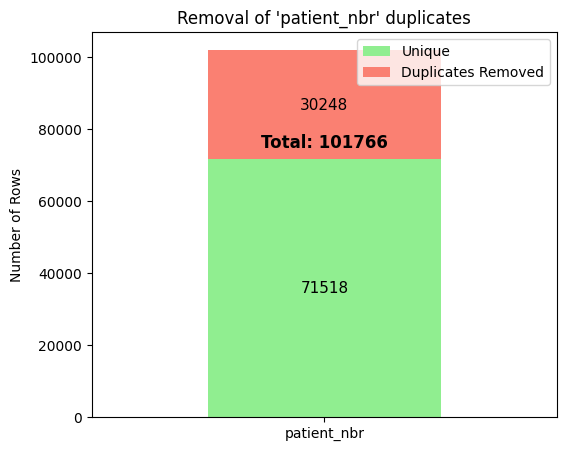

In [8]:
#%% Create a summary DataFrame for visualisation
summary_df = pd.DataFrame({
    'Unique': nbr_patients_after,
    'Duplicates Removed': removed
}, index=['patient_nbr'])
# Plot using pandas
ax = summary_df.plot(kind='bar', stacked=True, figsize=(6, 5), color=['lightgreen', 'salmon'],
                    title="Removal of 'patient_nbr' duplicates",
                    ylabel="Number of Rows", rot=0)
# Add value labels
for idx, row in summary_df.iterrows():
    cumulative = 0
    for col in summary_df.columns:
        height = row[col]
        cumulative += height
        ax.text(0, cumulative - height / 2, f'{int(height)}', ha='center', va='center', fontsize=11)
# Add total value on top of the bar
ax.text(0, data.shape[0] + 2000, f'Total: {nbr_patients_before}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

In [9]:
print(data.shape)

(71518, 49)


In [10]:
# We drop the variables patient_nbr as it is our identifier to prevent any bias
data.drop(['patient_nbr'], axis=1, inplace=True)

In [11]:
#%% Checking and Handling of Missing values 
# The observation of the data shows that some missing values are represented by '?'
data.replace('?',pd.NA, inplace=True)
threshold = 0.4 * len(data) # Thresold of dropping variables

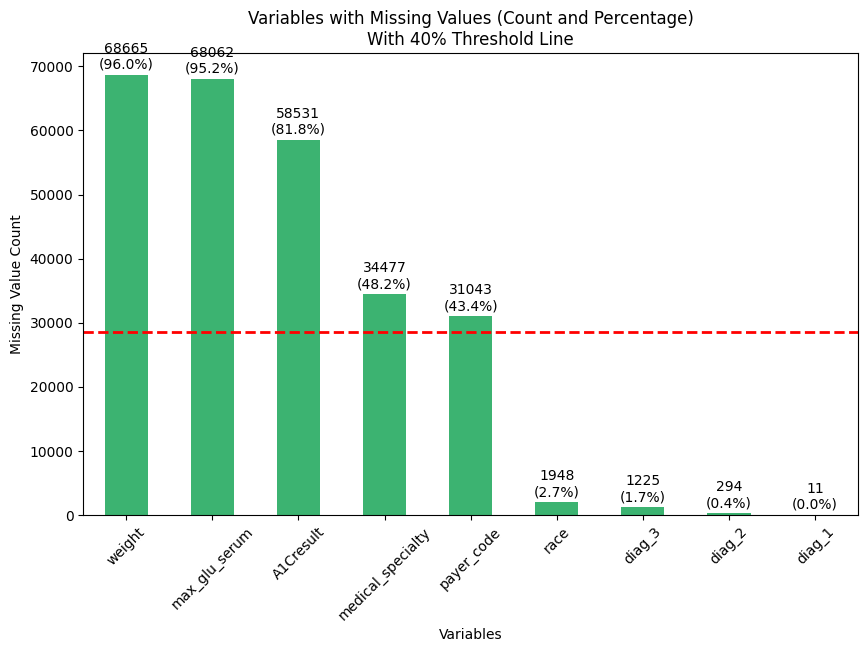

In [12]:
#%% Visualisation
# Calculate missing percentage per column
missing_percentage = data.isnull().mean() * 100
filtered_missing = missing_percentage[missing_percentage>0].sort_values(ascending=False)
# Convert percentages to counts
missing_counts_filtered = (filtered_missing / 100) * len(data)
# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = missing_counts_filtered.plot(kind='bar', color='mediumseagreen',
                                   title="Variables with Missing Values (Count and Percentage)\nWith 40% Threshold Line",
                                   xlabel="Variables", ylabel="Missing Value Count", rot=45)
# Annotate with count and percentage
for i, (count, percent) in enumerate(zip(missing_counts_filtered, filtered_missing)):
    label = f'{int(count)}\n({percent:.1f}%)'
    plt.text(i, count + 500, label, ha='center', va='bottom', fontsize=10)
# Add 40% threshold line
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label='40% Threshold')
plt.show()

In [13]:
# Dropping of variables with more than 40% missing values
cleaned_data = data.dropna(axis=1,thresh=len(data)-threshold)
print(cleaned_data.columns)
del data

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')


In [14]:
#***** Handling of the missing values from 'race', 'diag1', 'diag2', 'diag3': Dropping******
# We will drop missing rows from variables 'diag_3', 'diag_2', 'diag_1' as the represent less
# than 2% (or quasi to none) of the total observations
cleaned_data = cleaned_data.dropna(subset=['diag_1', 'diag_2', 'diag_3'])

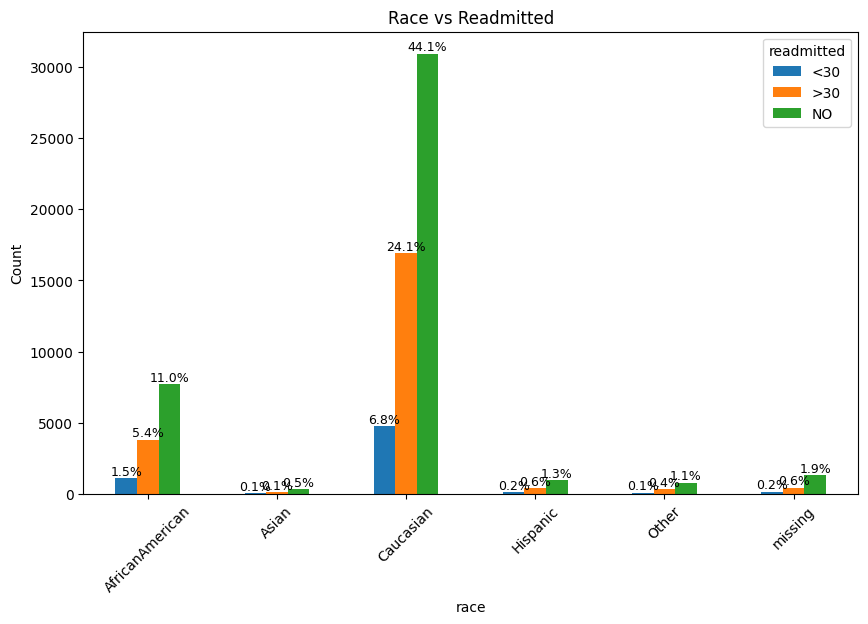

In [15]:
#%% Visualisation of 'race' against 'readmitted

cleaned_data.replace(pd.NA, 'missing', inplace=True)
# Count of readmitted by race
count_data = pd.crosstab(cleaned_data['race'], cleaned_data['readmitted'])
# Plot 
ax = count_data.plot(kind='bar', figsize=(10, 6), rot=45,
                    title="Race vs Readmitted", xlabel="race", ylabel="Count", legend="Readmitted")
# Add percentage labels
total_rows = len(cleaned_data)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_rows:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)
plt.show()
cleaned_data.replace('missing', pd.NA, inplace=True)

In [16]:
# The visualisation shows that Caucasian dominates in term of readmission and not readmission (with 44.1% of patients not readmitted
# Asian have the less readmission and not readmission
# The missing race categories have less impact on the total of readmission, so we drop these missing values
cleaned_data = cleaned_data.dropna()

In [17]:
# Discharge_disposition_id = 6 for dead patients, so no risk of readmission (see IDS_mapping.csv)
# To prevent bias from those obs, we will only keep patients who are not dead
cleaned_data = cleaned_data[cleaned_data['discharge_disposition_id'] != 6]

In [18]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60305 entries, 1 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      60305 non-null  object
 1   gender                    60305 non-null  object
 2   age                       60305 non-null  object
 3   admission_type_id         60305 non-null  int64 
 4   discharge_disposition_id  60305 non-null  int64 
 5   admission_source_id       60305 non-null  int64 
 6   time_in_hospital          60305 non-null  int64 
 7   num_lab_procedures        60305 non-null  int64 
 8   num_procedures            60305 non-null  int64 
 9   num_medications           60305 non-null  int64 
 10  number_outpatient         60305 non-null  int64 
 11  number_emergency          60305 non-null  int64 
 12  number_inpatient          60305 non-null  int64 
 13  diag_1                    60305 non-null  object
 14  diag_2                    

In [19]:
#%% Removal of irrelevant sparse columns and quasi-to zero variance columns
def FeatureContribution(column_name):
    '''
    Parameters
    ----------
    column_name : String
        The column/variable to analyse.

    Returns
    -------
    None.
    '''
    # Calculate value counts as percentages
    value_percentages = cleaned_data[column_name].value_counts(normalize=True) * 100
    # Filter values with more than 98% occurrence
    dominant_values = value_percentages[value_percentages > 98]
    if not dominant_values.empty:
        # Plot the contribution chart
        column_contribution = pd.crosstab(cleaned_data[column_name], 
                                      cleaned_data['readmitted'],
                                      normalize='columns') * 100
        plt.figure(figsize=(12,6))
        ax = column_contribution.plot(kind='bar', stacked=False,
                                 title=f'{column_name} contribution %',
                                 xlabel=column_name, ylabel='%age on readmitted')
        # Add percentage labels on top of each bar
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),ha='center', va='bottom', fontsize=9)

C:\Users\Rodez\AppData\Local\Temp\ipykernel_52296\434100993.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,6))


<Figure size 1200x600 with 0 Axes>

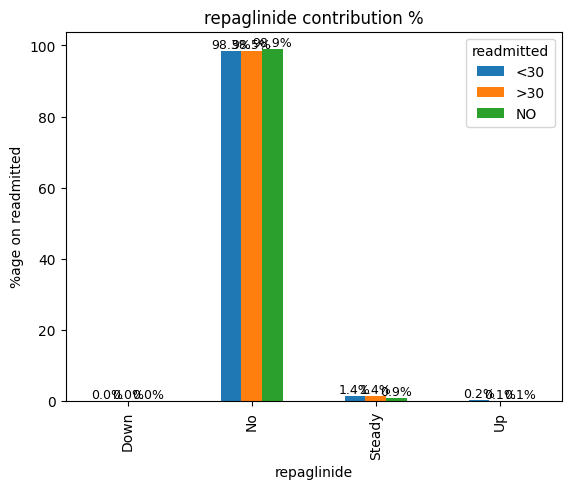

<Figure size 1200x600 with 0 Axes>

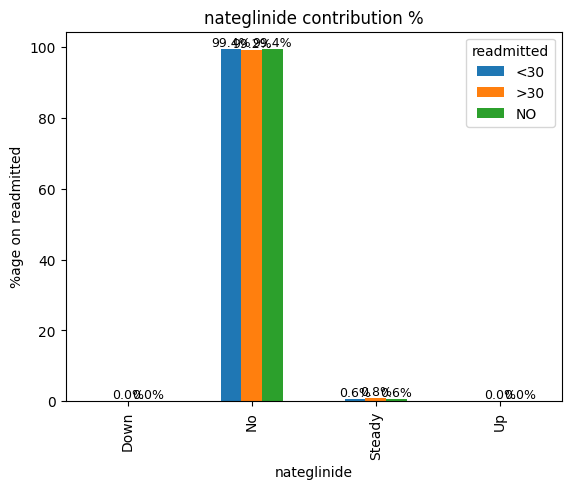

<Figure size 1200x600 with 0 Axes>

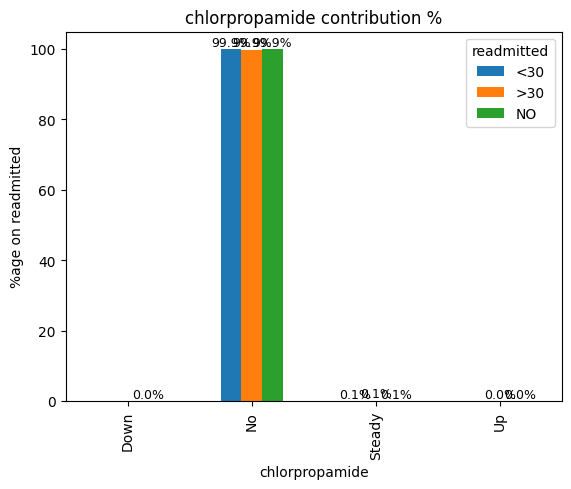

<Figure size 1200x600 with 0 Axes>

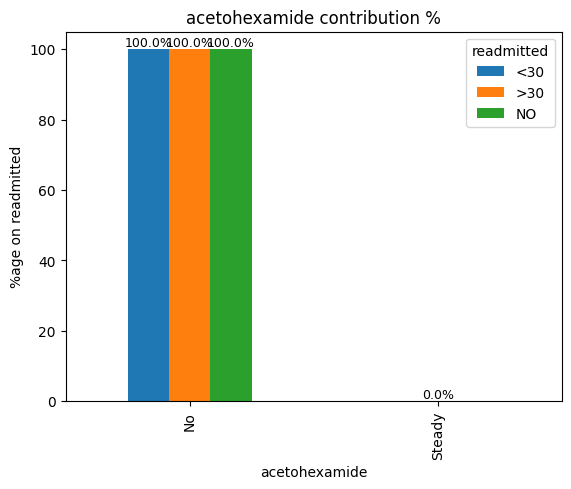

<Figure size 1200x600 with 0 Axes>

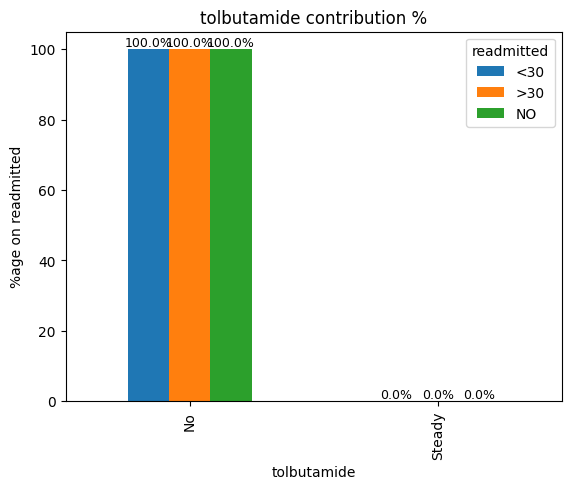

<Figure size 1200x600 with 0 Axes>

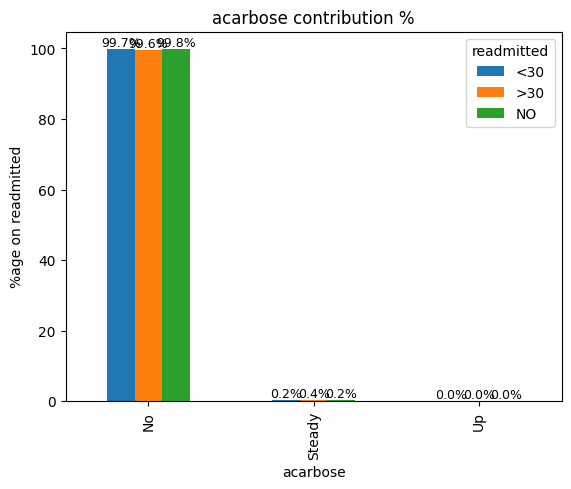

<Figure size 1200x600 with 0 Axes>

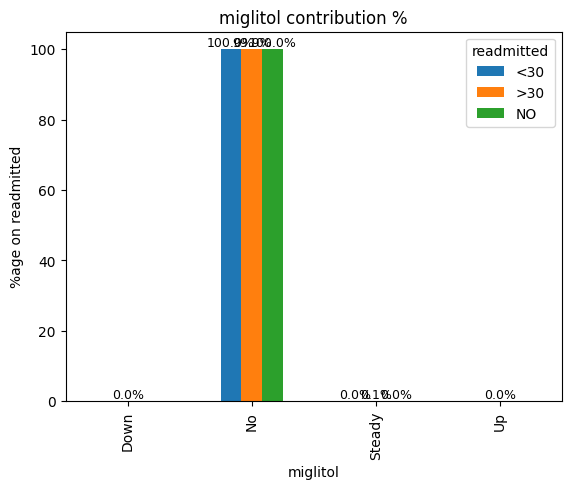

<Figure size 1200x600 with 0 Axes>

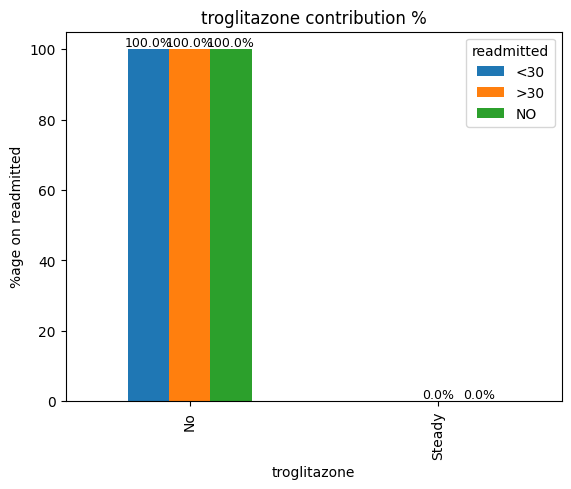

<Figure size 1200x600 with 0 Axes>

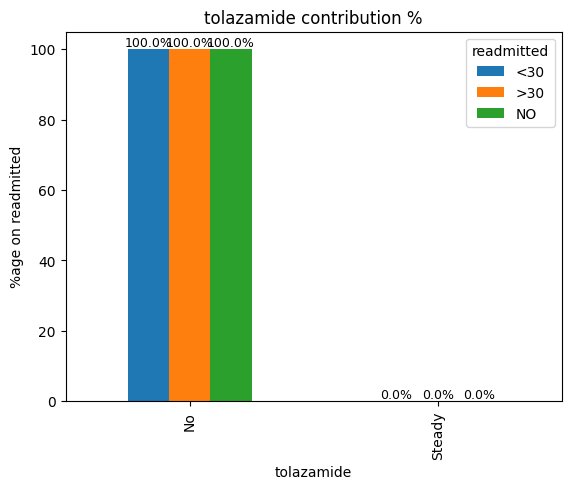

<Figure size 1200x600 with 0 Axes>

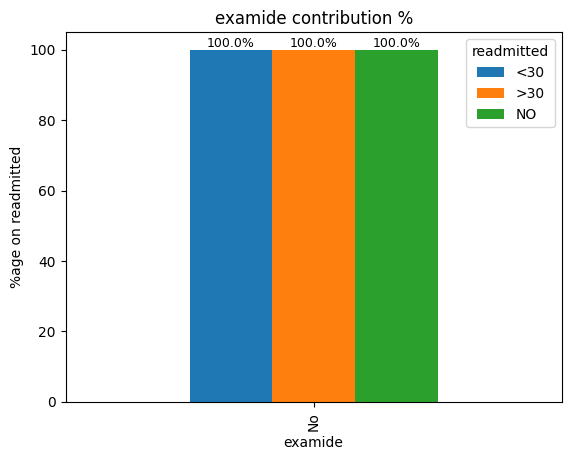

<Figure size 1200x600 with 0 Axes>

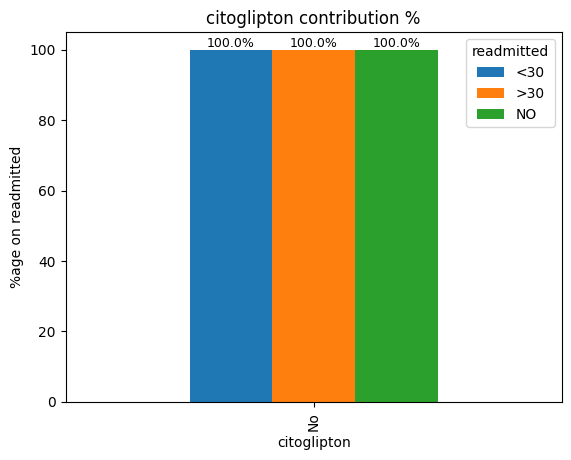

<Figure size 1200x600 with 0 Axes>

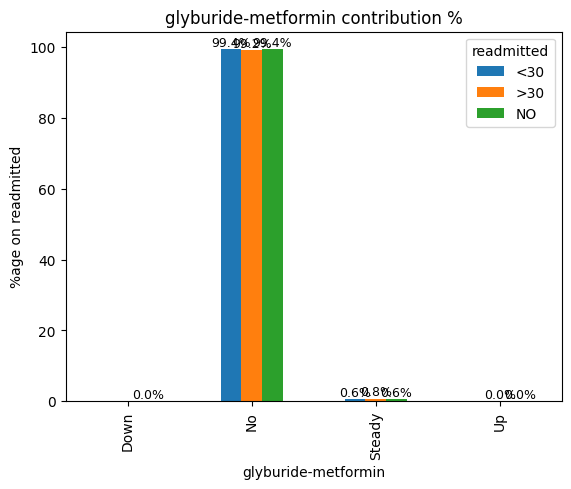

<Figure size 1200x600 with 0 Axes>

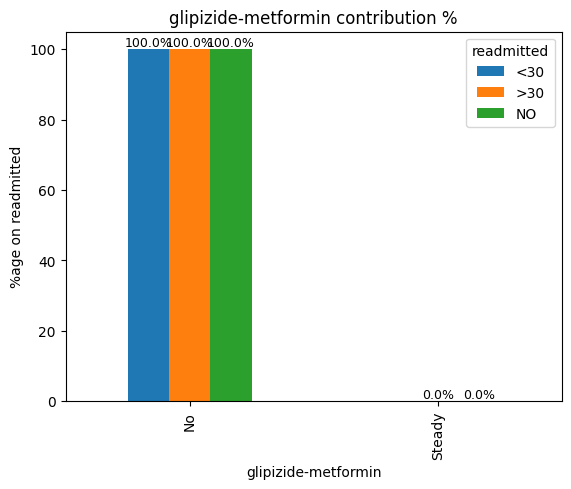

<Figure size 1200x600 with 0 Axes>

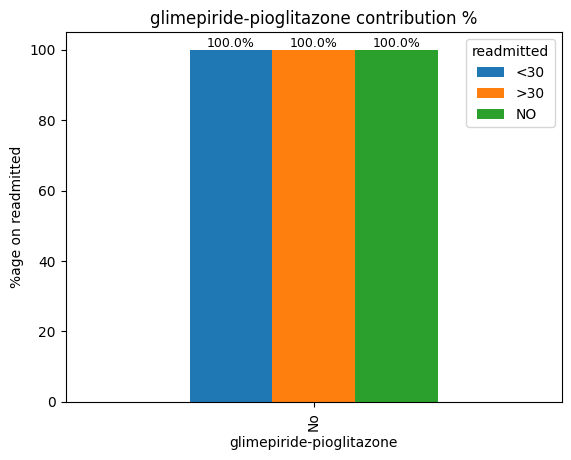

<Figure size 1200x600 with 0 Axes>

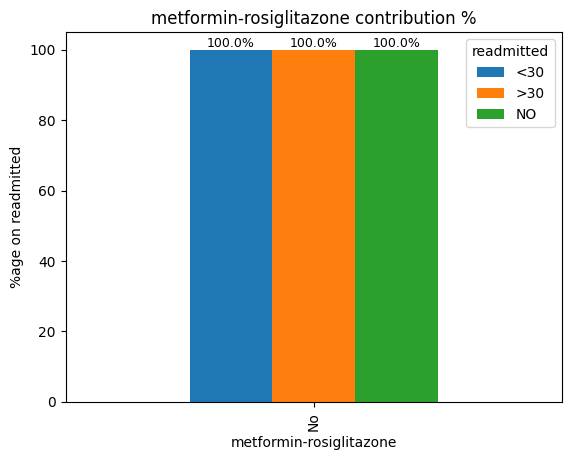

<Figure size 1200x600 with 0 Axes>

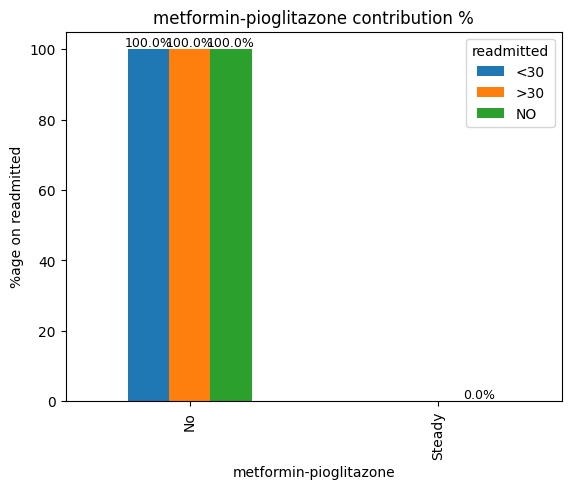

In [20]:
for column in cleaned_data.columns.tolist():
    FeatureContribution(column)

In [21]:

# Dropping of irrelevant sparse values with a threshold of 98%
# Variables to drop: 'chlorpropamide' (99.9% to 100% of No), 'acetohexamide' (with 100% of No), 'tolbutamide' (100%)
#                     'miglitol' (100%), 'troglitazone' (100%), 'tolazamide' (100%), 'examide' (100%),'citoglipton' (100%),
#                     'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
cleaned_data = cleaned_data.drop(['chlorpropamide', 'acetohexamide', 'tolbutamide','miglitol', 'troglitazone', 
                                          'tolazamide', 'examide','citoglipton'], axis=1)
#                     'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
# Variables to keep: 'nateglinide','glyburide-metformin'
# Those variables are kept because the have meaningful contribution for their less dominant value if we consider our values of our dataset.
print(cleaned_data.columns)

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')


In [22]:
#################################################
########### FEATURES ENGINEERING ################
################################################

In [23]:
# Features creation: from medications variables
# We create 2 news features: 'count_medic_used', 'count_medic_change'
medications =['metformin','repaglinide','nateglinide','glimepiride','glipizide','glyburide', 'pioglitazone',
              'rosiglitazone', 'acarbose', 'glyburide-metformin','glipizide-metformin', 
              'glimepiride-pioglitazone','metformin-rosiglitazone', 'metformin-pioglitazone']
# Creation of features 'count_medic_used'
cleaned_data['count_medic_used'] = cleaned_data[medications].apply(
    lambda row: row.isin(['Steady', 'Up', 'Down']).sum(), axis=1
)
# Creation of features 'count_medic_used'
cleaned_data['count_medic_change'] = cleaned_data[medications].apply(
    lambda row: row.isin(['Up', 'Down']).sum(), axis=1
)

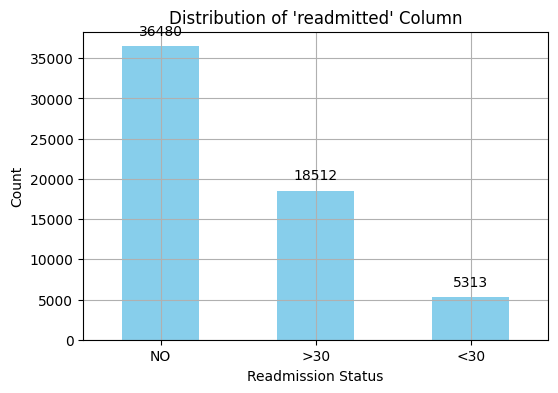

In [24]:
####### Label Encoding #######
#%% Visualisation of the target variable: readmitted
 # Plotting
plt.figure( figsize=(6, 4))
cleaned_data['readmitted'].value_counts().plot(kind='bar',color='skyblue', grid=True,
    title="Distribution of 'readmitted' Column",
    xlabel="Readmission Status",
    ylabel="Count"
)
# Add value labels on top of each bar
for i, count in enumerate(cleaned_data['readmitted'].value_counts()):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=0)
plt.show()

# From the visualisation, we can see the data is unbalanced.
# We will deal with this aspect later using the RandomUndersampling

In [25]:
#%% Encode the target variable into three classes
cleaned_data['readmitted'] = cleaned_data['readmitted'].map({
    'NO': 0,     # Not readmitted
    '>30': 1,    # Readmitted after 30 days
    '<30': 2     # Readmitted within 30 days
})

In [26]:
# Encode categorical variables
# Apart from age (ordinal variable) which suits best with LabelEncoding,
# The remaining variables are best suited for one-Hot Encoding.
# However, we take the risk of running out of CPU resources due to too many variables created.
# e.g. the variables diag_3 has many distinct values (visualisation)
cleaned_data['diag_3'].describe()
# Therefore LabelEncoding is used to encode all our categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
encoded_data = cleaned_data.copy()
for col in cleaned_data.select_dtypes(include='object'):
    le = LabelEncoder() # Initialise a LabelEncoder from sklearn.preprocessing
    encoded_data[col] = LabelEncoder().fit_transform(cleaned_data[col].astype(str))
    label_encoders[col] = le # Stores the encoded value into a dict
print(encoded_data.head(20))

    race  gender  age  admission_type_id  discharge_disposition_id  \
1      2       0    1                  1                         1   
2      0       0    2                  1                         1   
3      2       1    3                  1                         1   
4      2       1    4                  1                         1   
5      2       1    5                  2                         1   
6      2       1    6                  3                         1   
7      2       1    7                  1                         1   
8      2       0    8                  2                         1   
9      2       0    9                  3                         3   
10     0       0    4                  1                         1   
11     0       1    6                  2                         1   
12     2       0    4                  1                         3   
14     0       0    6                  3                         1   
15     0       1    

In [27]:
#%% Splitting of the dataset into training and testing set
from sklearn.model_selection import train_test_split

# Separate features and target
X = encoded_data.drop(columns=['readmitted'])  # Features
y = encoded_data['readmitted']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#%% Features Selection: use of the Mutual Information (MI)
from sklearn.feature_selection import mutual_info_classif, SelectKBest
# Compute mutual information scores 
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=True)
print(X_train)

       race  gender  age  admission_type_id  discharge_disposition_id  \
46607     2       0    5                  1                         1   
88217     2       1    8                  6                         1   
51141     2       0    8                  1                        22   
92275     2       0    4                  2                         1   
92552     0       0    8                  1                        13   
...     ...     ...  ...                ...                       ...   
90468     2       1    6                  2                         1   
59723     2       0    8                  1                         3   
1038      2       0    3                  1                         1   
24807     2       1    5                  2                         1   
94113     2       0    6                  1                         1   

       admission_source_id  time_in_hospital  num_lab_procedures  \
46607                    7                 1           

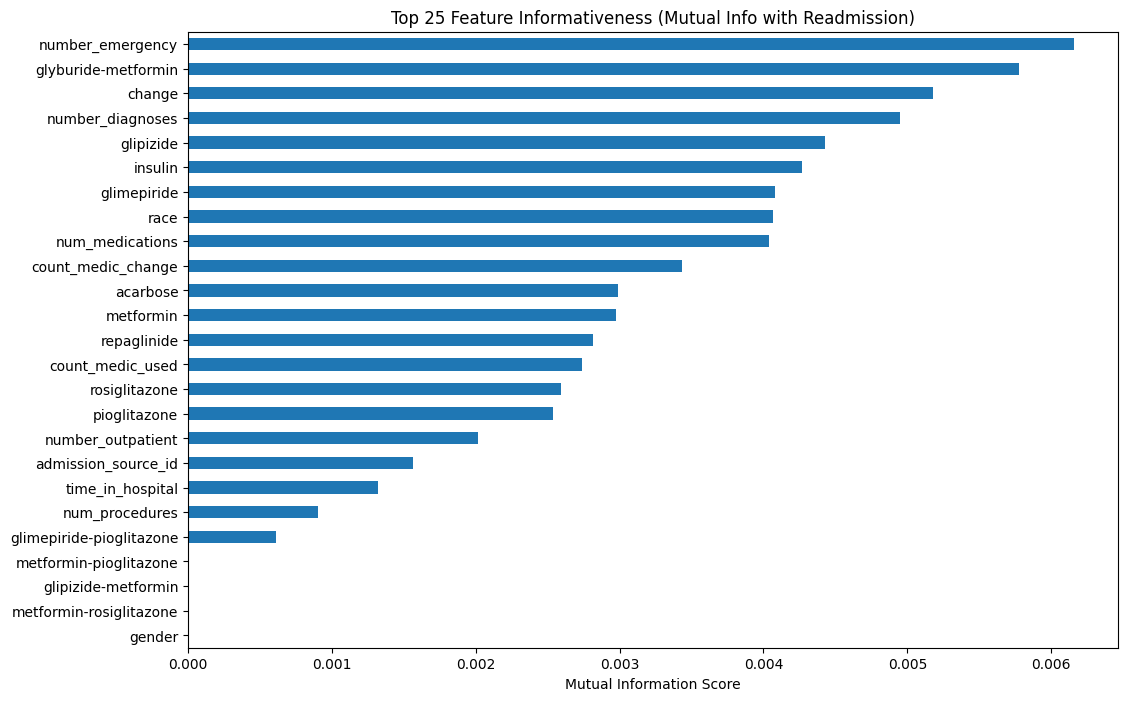

In [29]:
# Visualise top 25 informative features
plt.figure(figsize=(12, 8))
mi_series.head(25).plot(kind='barh', xlabel="Mutual Information Score", 
                       title="Top 25 Feature Informativeness (Mutual Info with Readmission)"
                       )
plt.show()

In [30]:
# From the MI, we select the top 20 variables using SelectKBest

# Perform feature selection on X_train only
selector = SelectKBest(score_func=mutual_info_classif, k=21)
X_train = selector.fit_transform(X_train, y_train)

# Apply the *same* transformation to X_test
X_test = selector.transform(X_test)

In [32]:
#%% Handle Unbalanced data: use of RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

print(f"Training set data before UnderSampling: X_train:{X_train.shape}, y_train:{y_train.shape}")
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
print(f"Training set data after UnderSampling: X_train:{X_train_resampled.shape}, y_train:{y_train_resampled.shape}")

Training set data before UnderSampling: X_train:(48244, 21), y_train:(48244,)
Training set data after UnderSampling: X_train:(12792, 21), y_train:(12792,)


In [33]:
#%% Scaling: StandardScaler
from sklearn.preprocessing import StandardScaler

# Fit scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
# Apply the same scaler to test data
X_test_scaled = scaler.transform(X_test)

In [34]:
################################################################
########## BUILD AND EVALUATE THE MODELS #######################
################################################################

In [35]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, 
                            accuracy_score, precision_score, recall_score, f1_score)


 Tuning and modelling KNN...
Best parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 450, 'model__weights': 'distance'}
Accuracy: 0.48 | Precision: 0.54 | Recall: 0.48 | F1-Score: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.50      0.58      7296
           1       0.37      0.50      0.43      3716
           2       0.15      0.25      0.18      1049

    accuracy                           0.48     12061
   macro avg       0.40      0.42      0.40     12061
weighted avg       0.54      0.48      0.50     12061

Execution Time: 13.45 seconds


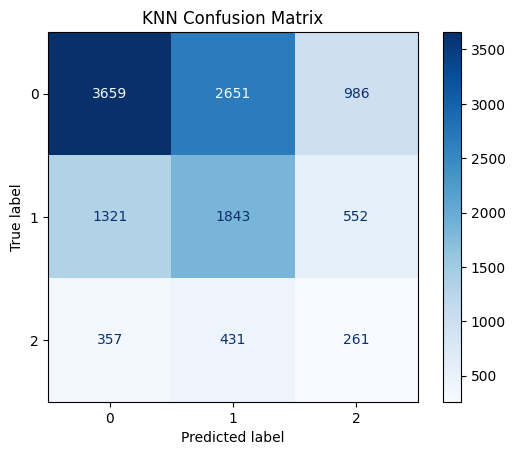


 Tuning and modelling SVM...
Best parameters: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Accuracy: 0.46 | Precision: 0.54 | Recall: 0.46 | F1-Score: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56      7296
           1       0.37      0.49      0.42      3716
           2       0.14      0.28      0.19      1049

    accuracy                           0.46     12061
   macro avg       0.40      0.41      0.39     12061
weighted avg       0.54      0.46      0.49     12061

Execution Time: 852.83 seconds


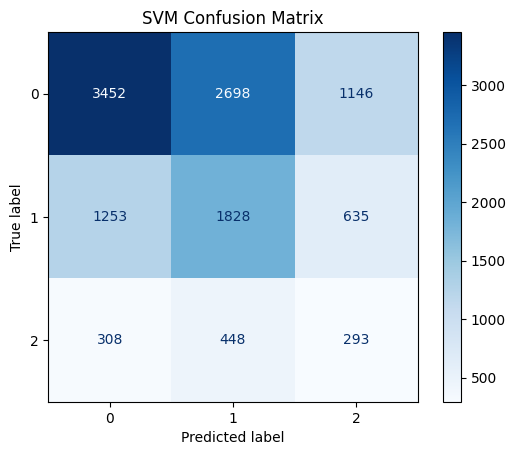


 Tuning and modelling NaiveBayes...
Best parameters: {'model__var_smoothing': 1e-09}
Accuracy: 0.55 | Precision: 0.53 | Recall: 0.55 | F1-Score: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.82      0.72      7296
           1       0.42      0.10      0.16      3716
           2       0.14      0.25      0.18      1049

    accuracy                           0.55     12061
   macro avg       0.40      0.39      0.36     12061
weighted avg       0.53      0.55      0.50     12061

Execution Time: 0.24 seconds


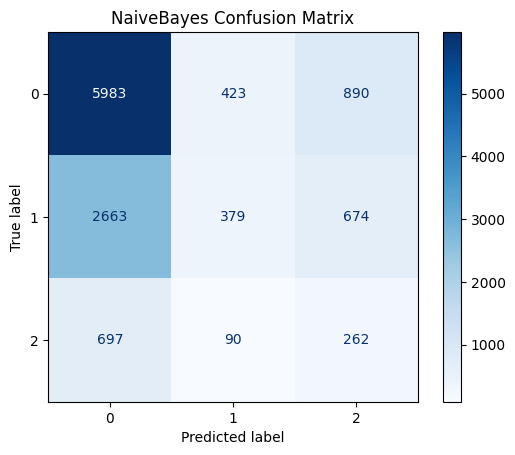


 Tuning and modelling RandomForest...
Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Accuracy: 0.47 | Precision: 0.56 | Recall: 0.47 | F1-Score: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.50      0.58      7296
           1       0.40      0.41      0.40      3716
           2       0.15      0.43      0.22      1049

    accuracy                           0.47     12061
   macro avg       0.42      0.45      0.40     12061
weighted avg       0.56      0.47      0.50     12061

Execution Time: 199.11 seconds


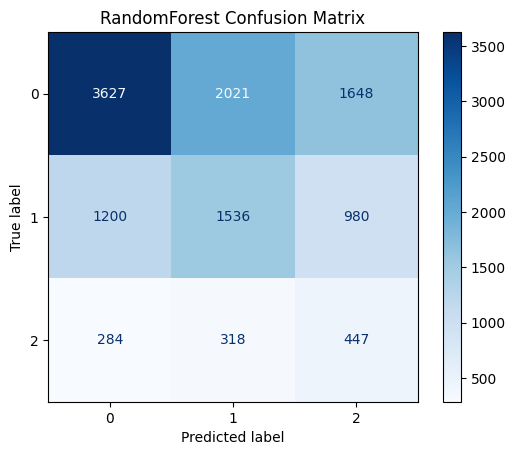

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import time

# Define model pipelines and parameter grids
models = {
    'KNN': {
        'pipeline': Pipeline([
          #  ('scaler', StandardScaler()),
            ('model', KNeighborsClassifier())
        ]),
        'params': {
            'model__n_neighbors': [300,400,450],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan', 'minkowski']
            
        }
    },
    'SVM': {
        'pipeline': Pipeline([
       #     ('scaler', StandardScaler()),
            ('model', SVC(probability=True, random_state=42))
        ]),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'poly', 'rbf'],
            'model__gamma': ['scale', 'auto']
        }
    },
    'NaiveBayes': {
        'pipeline': Pipeline([
        #    ('scaler', StandardScaler()),
            ('model', GaussianNB())
        ]),
        'params': {
            'model__var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    },
    'RandomForest': {
        'pipeline': Pipeline([
         #   ('scaler', StandardScaler()),
            ('model', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': [100, 200, 250, 300],
            'model__max_depth': [None, 5, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2]
        }
    }
}

# Dictionary to store results
results = {}

# Loop through models
for name, config in models.items():
    print(f"\n Tuning and modelling {name}...")
    
    grid = GridSearchCV(
        config['pipeline'],
        config['params'],
        cv=cv_splitter,
        scoring='accuracy',
        n_jobs=-1
    
    )
    st = time.time()
    grid.fit(X_train_scaled, y_train_resampled)
    y_pred = grid.predict(X_test_scaled)
    exe_time = time.time() - st
    # Compute metrics
    class_report = classification_report(y_test, y_pred, zero_division=0)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'best_params': grid.best_params_,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'execution time': exe_time
    }

    # Print results
    print(f"Best parameters: {grid.best_params_}")
    print(f"Accuracy: {acc:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f} | F1-Score: {f1:.2f}")
    print(f"Classification Report:\n {class_report}")
    print(f"Execution Time: {exe_time:.2f} seconds")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()
